In [9]:
import sys
sys.path.append('./')

from Analyzation_relative import Descriptive_statistics as DS
from Analyzation_relative import Data_process as DP
from Analyzation_relative import Regression as Reg
from Analyzation_relative import Statistical_inference as SI
from Analyzation_relative import Multivariate_statistical as MS
from Analyzation_relative.Statistical_inference import Normality_test

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei'] # *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

params = {'legend.fontsize': 7,}

plt.rcParams.update(params)

# 以2019北京的租房数据为例
<font color = "#9bc1b2">月租金（rent）、卧室数（bedroom）、厅数（livingroom）、卫生间数（bathroom）、
租赁面积（area）、租赁房间是否是主卧（room）、所在楼层分组（floor_grp）、邻近地铁（subway）、城区（region）、是否集中供暖（heating）</font>

In [10]:
df = pd.read_csv("data/test_data.csv",encoding = "utf-8")
df

,rent,bedroom,livingroom,bathroom,area,room,floor_grp,subway,region,heating
0,2730,2,1,1,12,1.0,2.0,1.0,通州,1.0
1,2740,3,1,1,9,0.0,0.0,1.0,昌平,1.0
2,2810,3,1,1,14,1.0,0.0,1.0,丰台,1.0
3,2650,4,1,1,8,0.0,0.0,1.0,丰台,1.0
4,2670,4,1,1,13,1.0,2.0,0.0,丰台,1.0
...,...,...,...,...,...,...,...,...,...,...
5144,3340,4,1,1,8,0.0,2.0,1.0,西城,1.0
5145,2790,3,1,1,18,1.0,0.0,1.0,朝阳,1.0
5146,2690,2,1,1,10,0.0,1.0,1.0,昌平,1.0
5147,2230,2,1,1,12,0.0,1.0,1.0,通州,1.0


# 可能不知道数据是啥样的，那可以先预览一次数据的效果

In [11]:
dfclass = DS.DataLabeling(df)
dfclass

[0, 2, 1, 1, 2, 1, 2, 1, 2, 1]

## 可以看到，程序并未正确识别area是数值型数据，此处进行人为纠正
<font size  = 5>因为area在数据搜集的时候忽略了小数点，以至于全是整数，但是DataLabeling对于50种一下的数据就会识别为多分类型数据</font>

In [12]:
dfclass[4] = 0
dfclass

[0, 2, 1, 1, 0, 1, 2, 1, 2, 1]

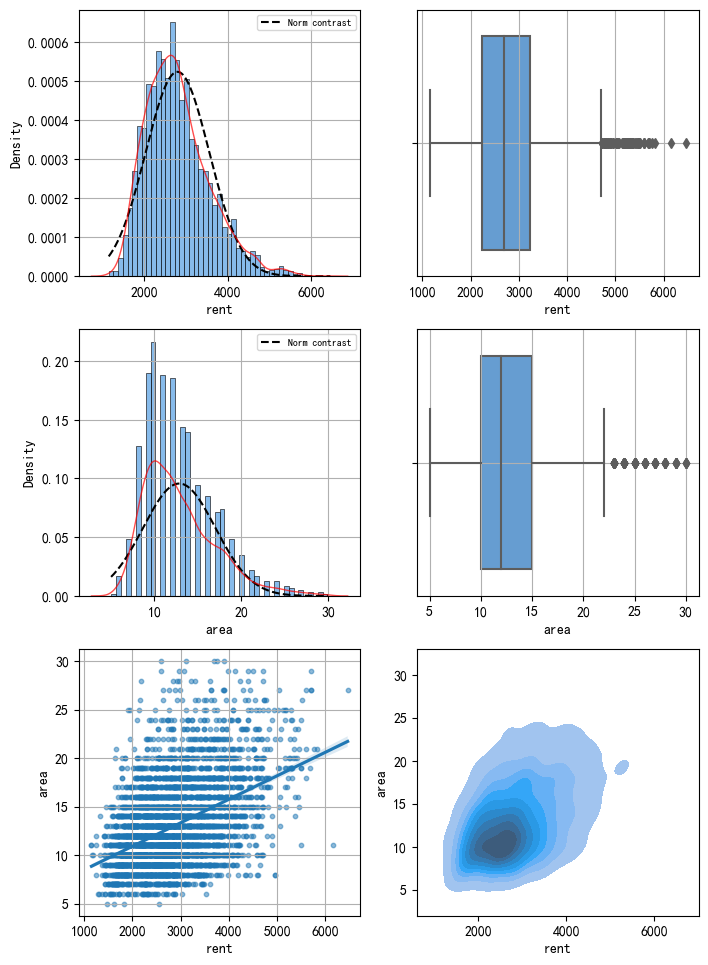

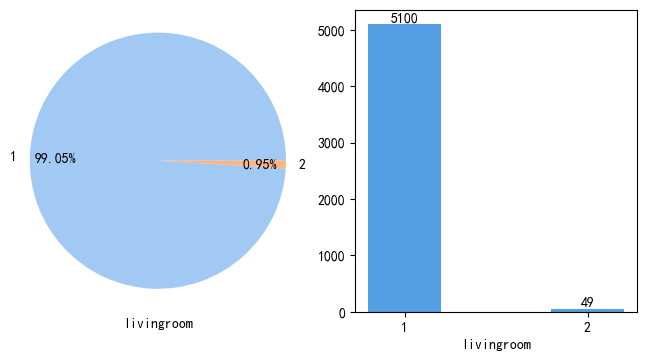

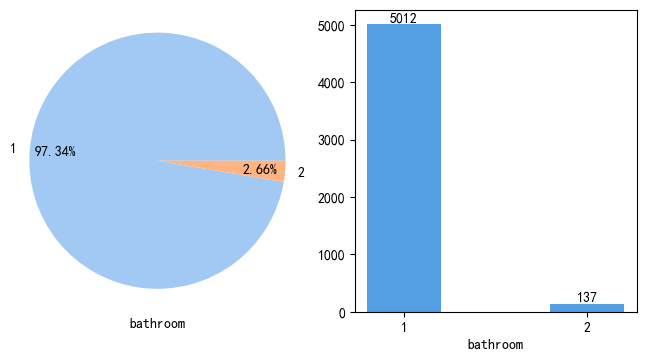

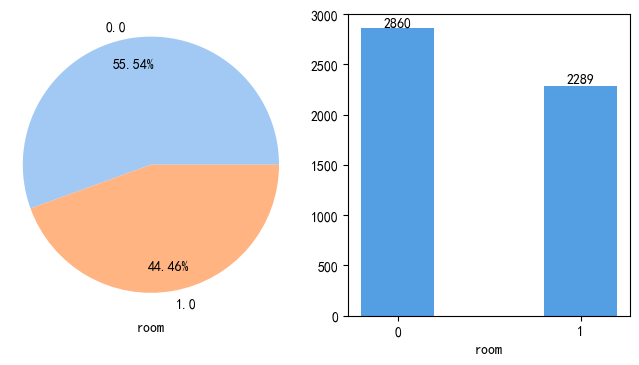

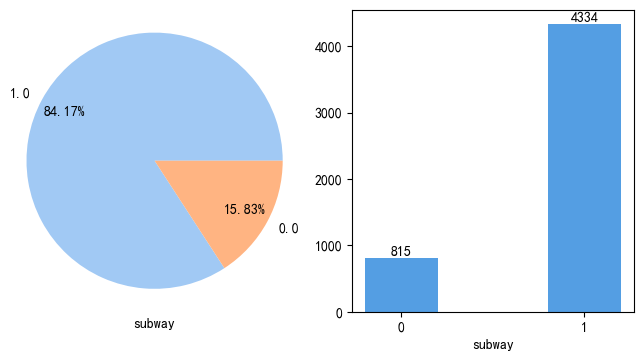

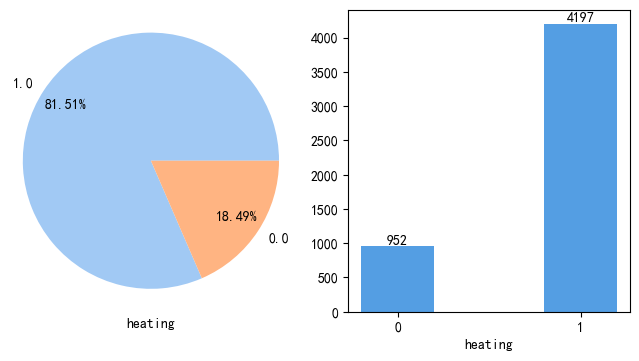

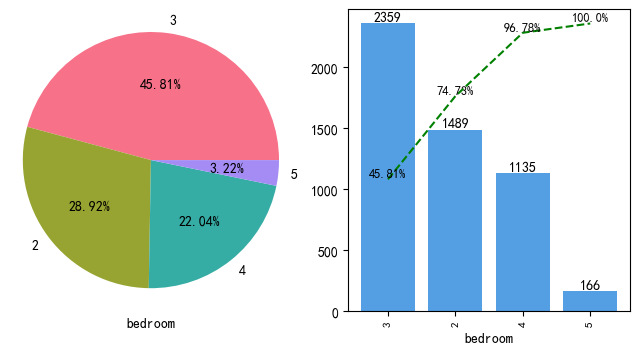

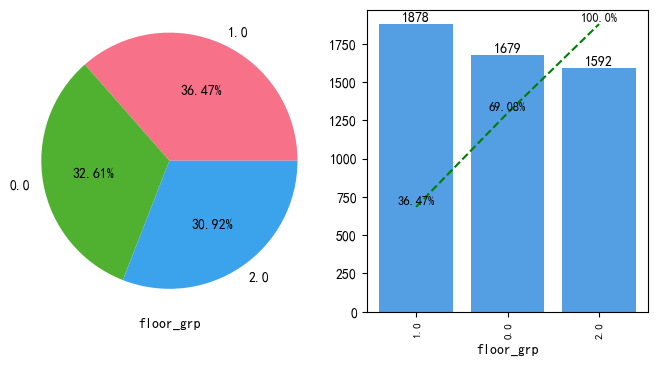

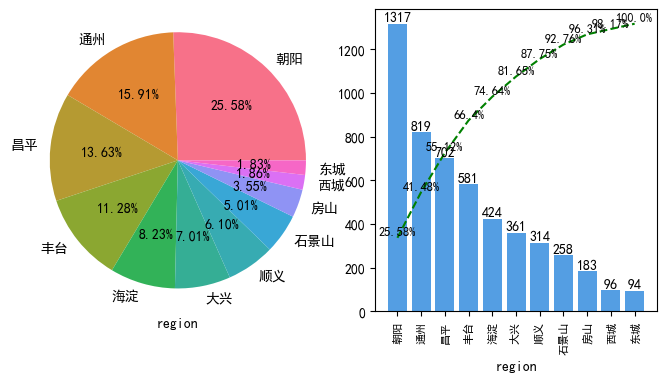

In [13]:
DS.Auto_plt(df , dataclass = dfclass , filepath='./test/BeiJing/descriptive_result')


上述结果在如下文件路径中呈现：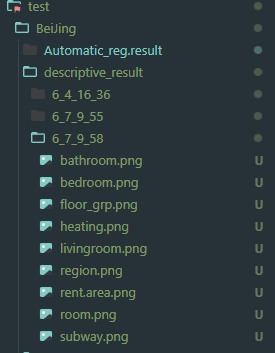

# 进行了一次初步的预览后，可能更关注是否存在缺失值和异常值

(Int64Index([], dtype='int64'),
       columns  Nan_count  Complete_count
 0        rent          0            5149
 1     bedroom          0            5149
 2  livingroom          0            5149
 3    bathroom          0            5149
 4        area          0            5149
 5        room          0            5149
 6   floor_grp          0            5149
 7      subway          0            5149
 8      region          0            5149
 9     heating          0            5149)

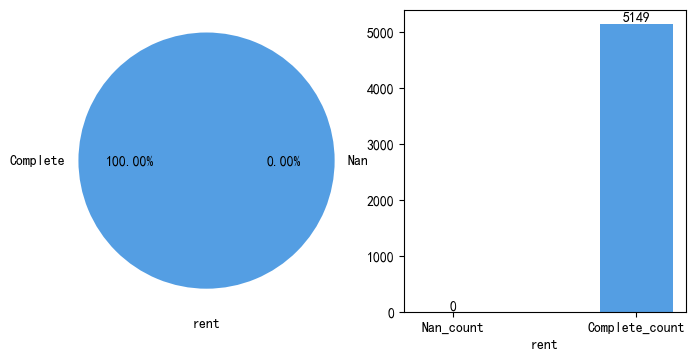

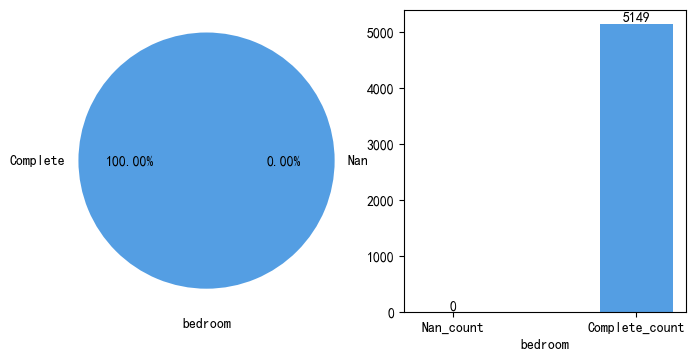

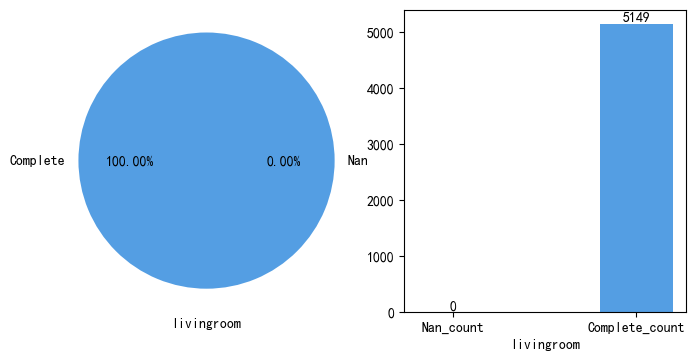

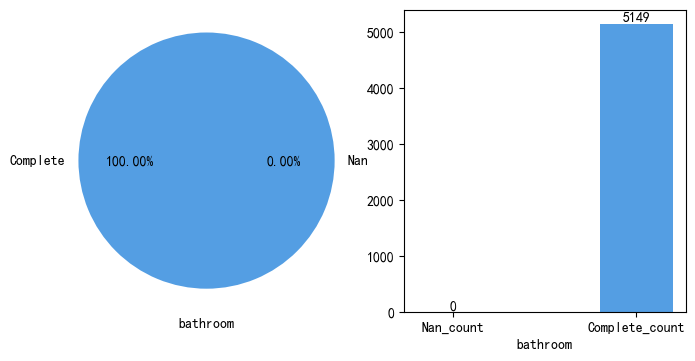

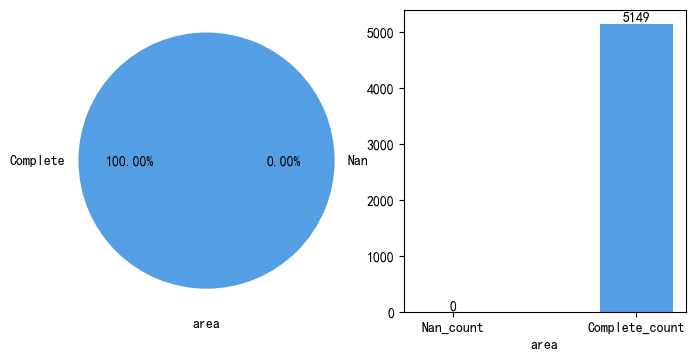

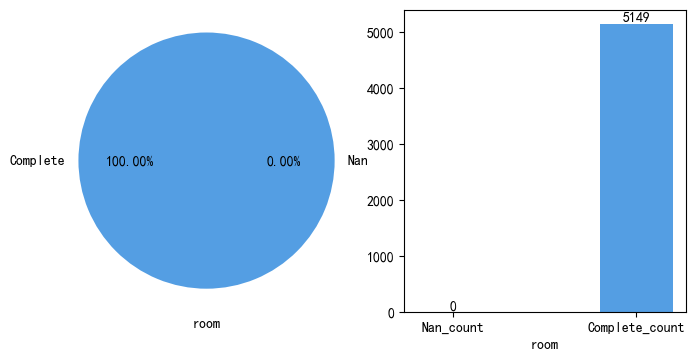

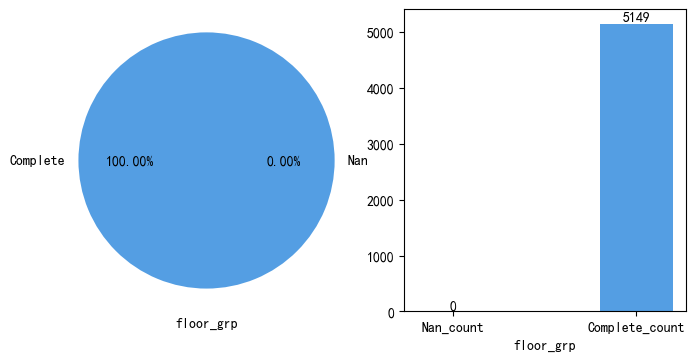

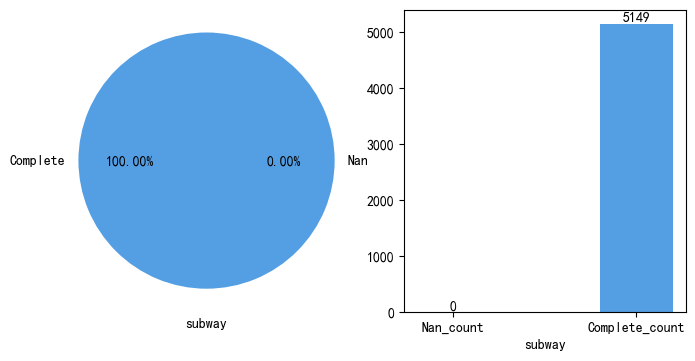

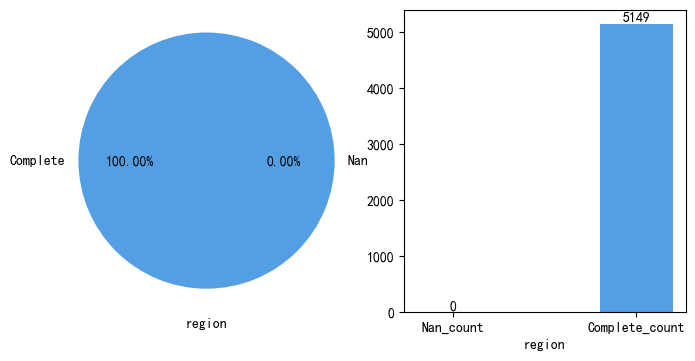

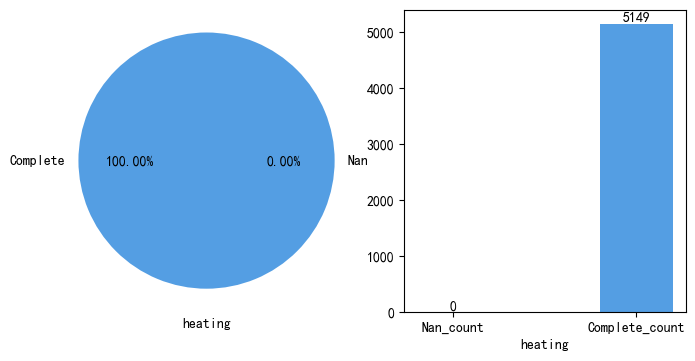

In [14]:
DP.Nan_CountAndPlot(df)

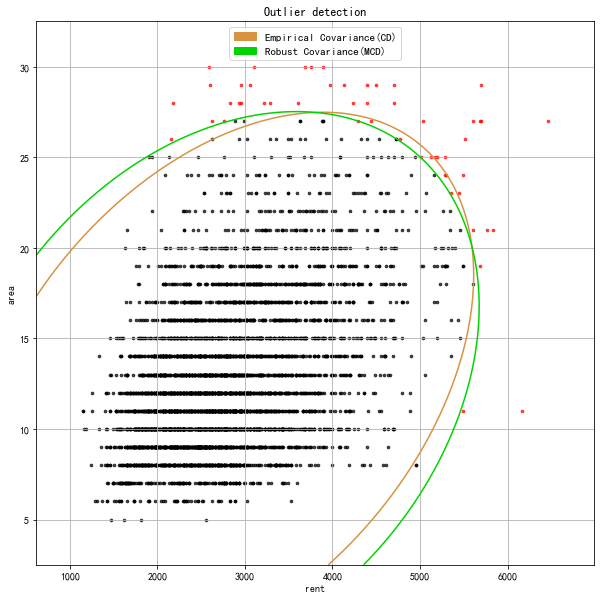

In [15]:
numout_index , binaout_index , df_pro = DP.Outlier_TreatAndPlot(df[['rent' , 'area']] , dataclass = [0 , 0] , filepath = './test/BeiJing/Outlier_condition' , contamination=0.01)

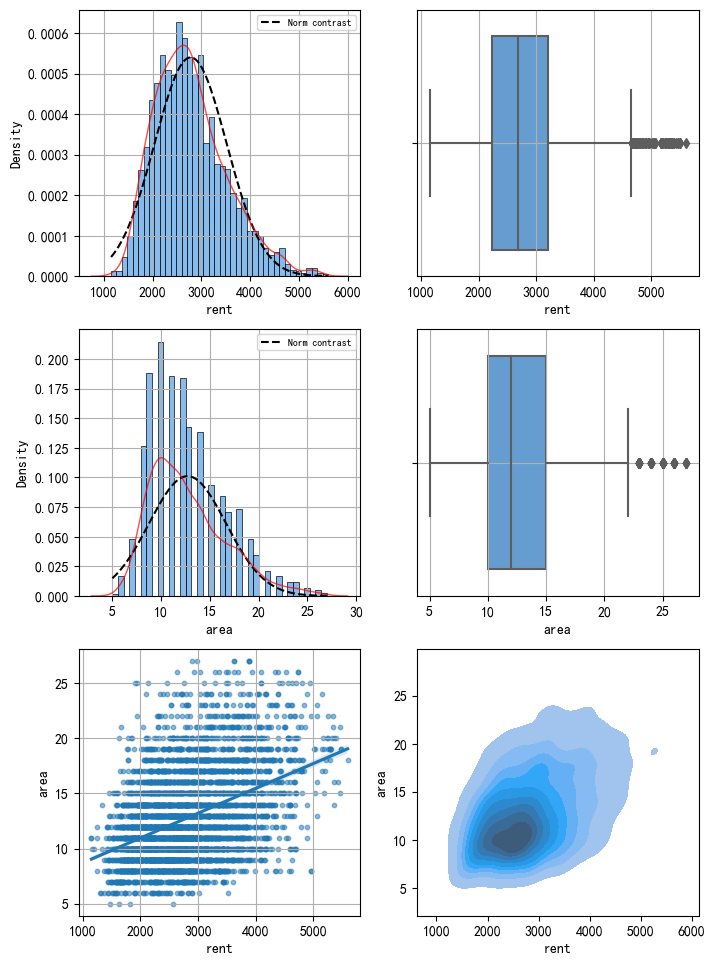

In [16]:
DS.Auto_plt(df_pro , dataclass = [0 , 0])

# 此处，为了演示效果，不进行额外的删除处理，以原始数据为例进行下一步流程

<font size  = 5.5>由于我引入了多线程进行并行计算，所以需要在终端中进行如下代码的运行。（因为Jupyter nootbook的线程间通讯损耗过大）</font>

```python
new_df = pd.read_csv('./data/test_data.csv' , encoding = 'utf-8')
mode , Xlist , args_list , result_list = Automatic_reg(new_df , dataclass = [0, 2, 1, 1, 0, 1, 2, 1, 2, 1] ,target_col = None ,  mode = None , filepath = './test/BeiJing')
```